# KNN

## Problem Statement 1

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# load the dataset
data=pd.read_csv(r"/content/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### EDA

In [3]:
# rows and columns in data
data.shape

(214, 10)

In [4]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Descriptive analysis
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Null values in dataset
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
# duplicates in dataset
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
# dropping duplicated row
data.drop(39).head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

#### Visualization

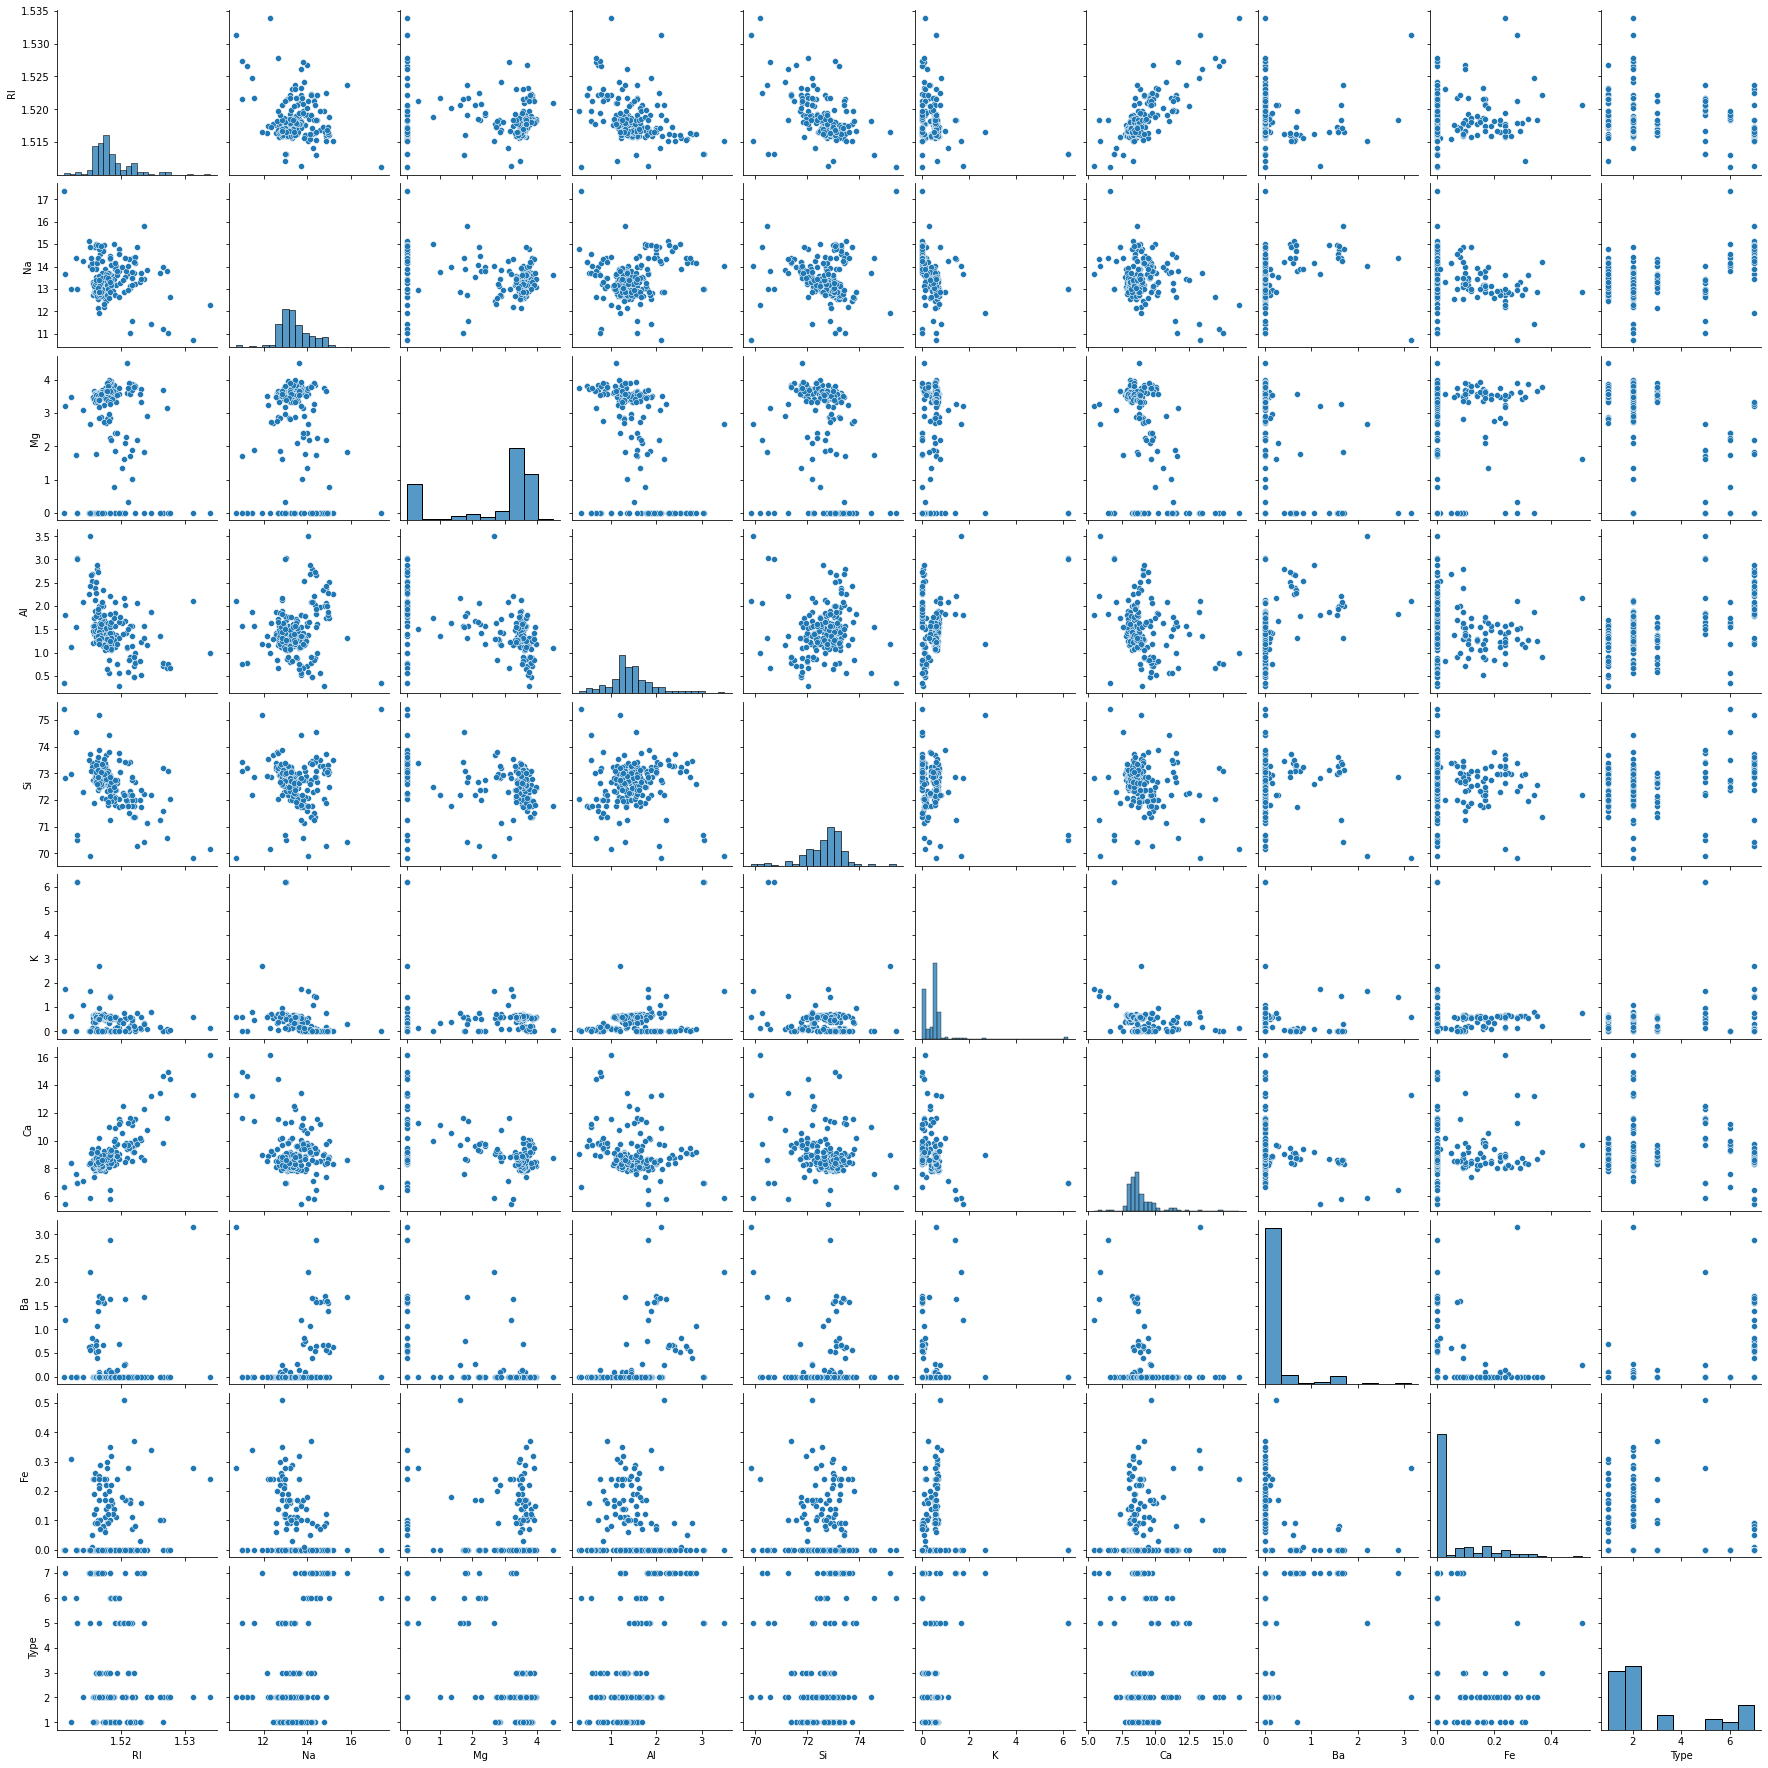

In [10]:
# Pairplot
sns.pairplot(data);

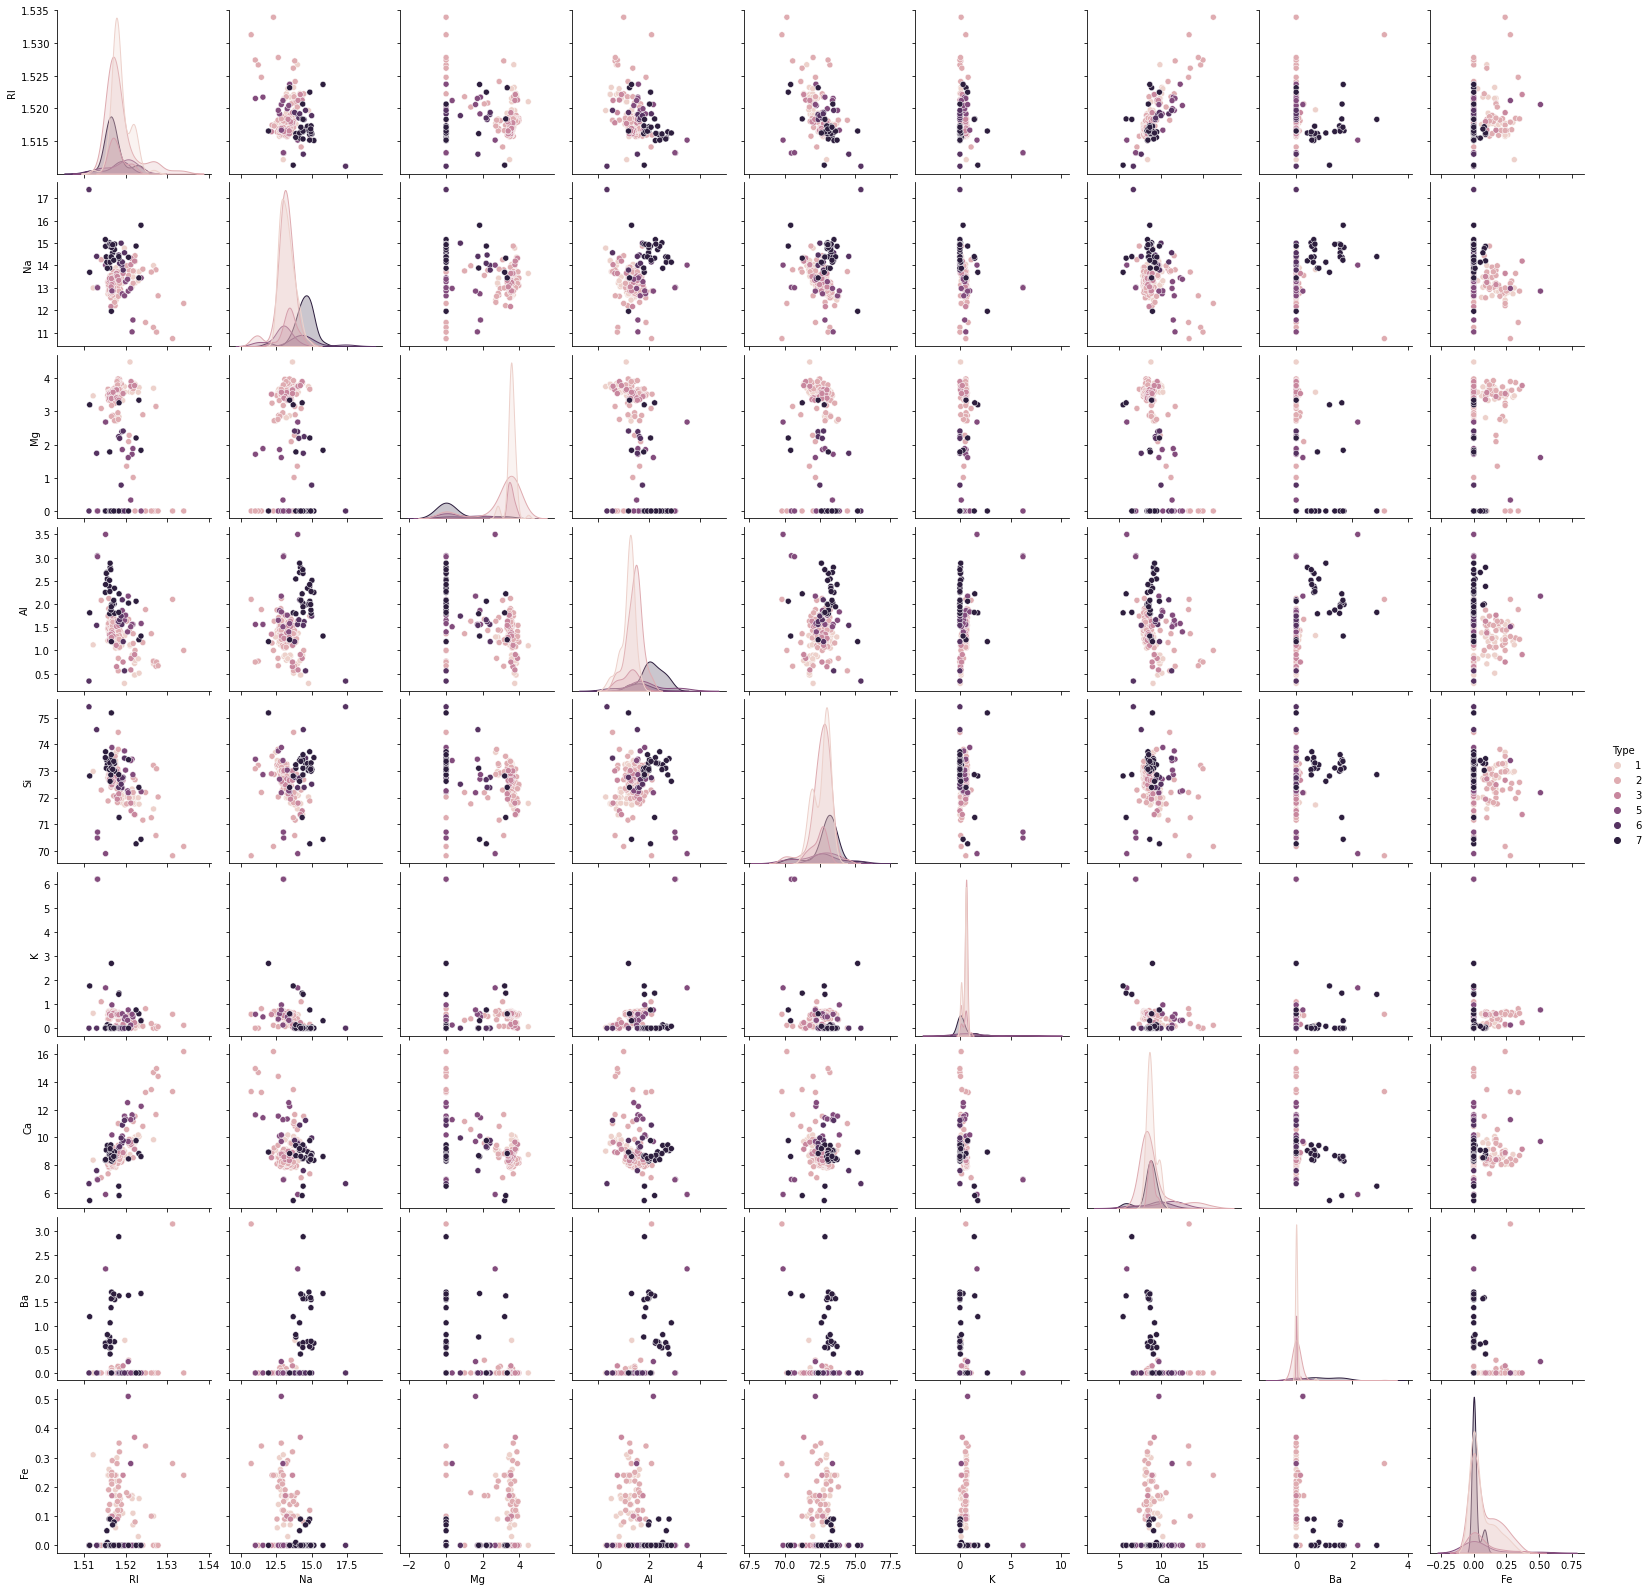

In [11]:
sns.pairplot(data, hue='Type')
plt.show()

Text(0.5, 1.0, 'Type')

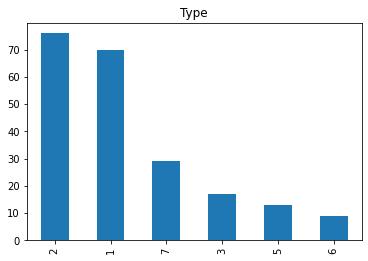

In [12]:
# Barplot
data['Type'].value_counts().plot.bar()
plt.title("Type")

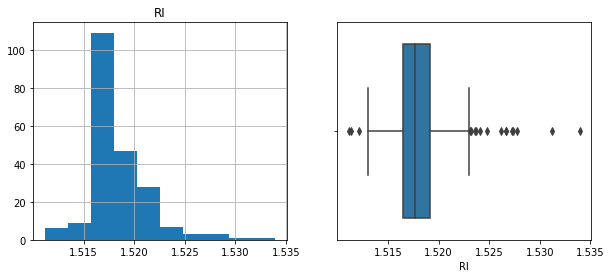

In [13]:
# Boxplot & Histogram
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['RI'].hist(),plt.title("RI")],
[plt.subplot(1,2,2),sns.boxplot(x=data["RI"])]

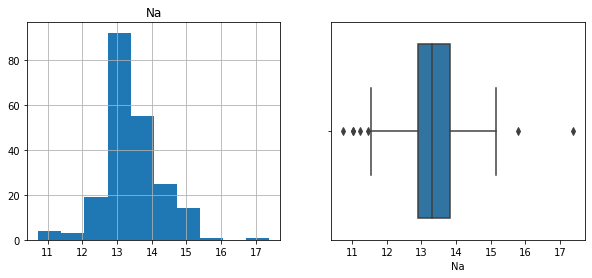

In [14]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Na'].hist(),plt.title("Na")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Na"])]

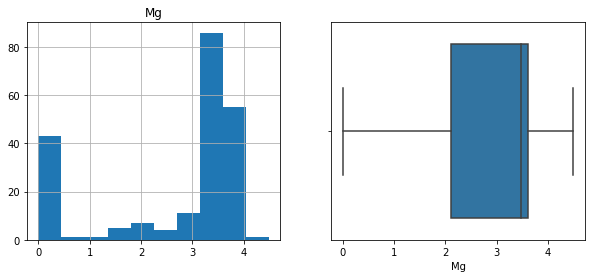

In [15]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Mg'].hist(),plt.title("Mg")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Mg"])]

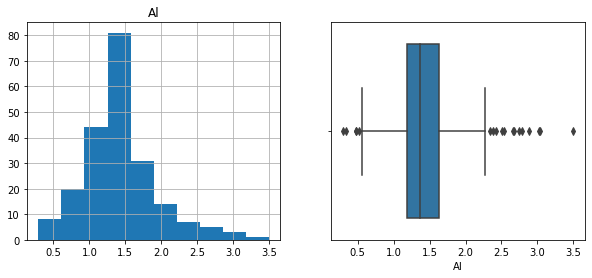

In [16]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Al'].hist(),plt.title("Al")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Al"])]

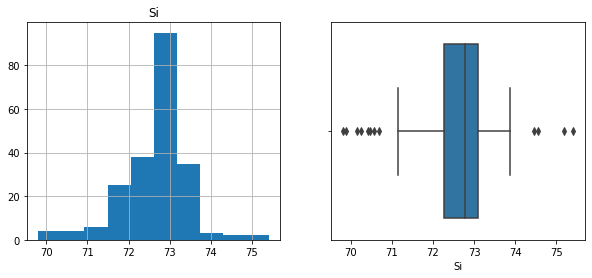

In [17]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Si'].hist(),plt.title("Si")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Si"])]

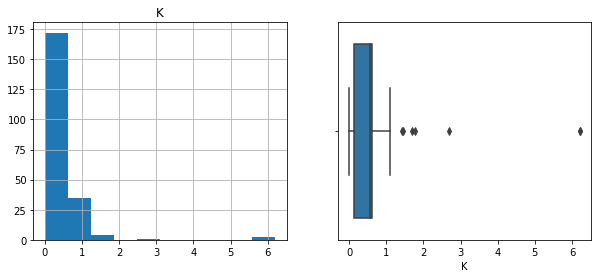

In [18]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['K'].hist(),plt.title("K")],
[plt.subplot(1,2,2),sns.boxplot(x=data["K"])]

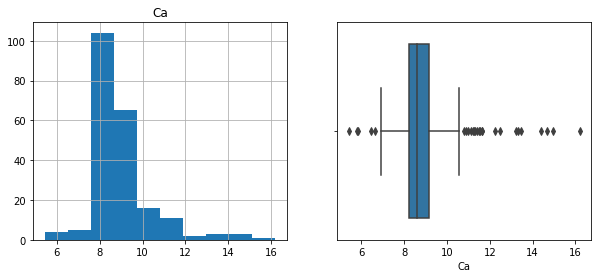

In [19]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Ca'].hist(),plt.title("Ca")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Ca"])]

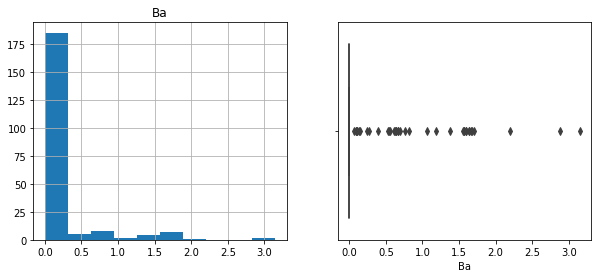

In [20]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Ba'].hist(),plt.title("Ba")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Ba"])]

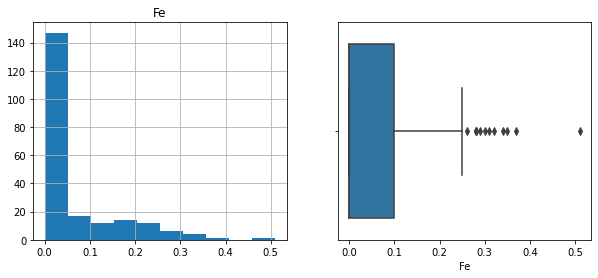

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Fe'].hist(),plt.title("Fe")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Fe"])]

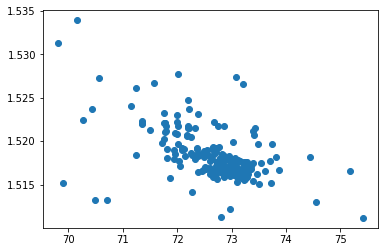

In [22]:
# Scatter plot of two variables

plt.scatter(data.Si,data.RI)

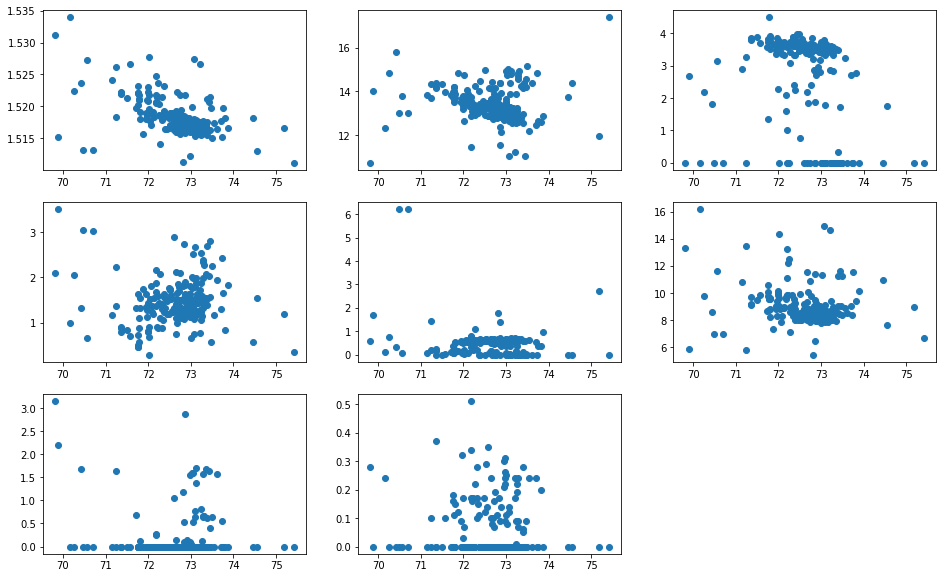

In [23]:
# Subplots
plt.subplots(figsize=(16, 10))

plt.subplot(3,3,1)
plt.scatter(data.Si,data.RI)

plt.subplot(3,3,2)
plt.scatter(data.Si,data.Na)

plt.subplot(3,3,3)
plt.scatter(data.Si,data.Mg)

plt.subplot(3,3,4)
plt.scatter(data.Si,data.Al)

plt.subplot(3,3,5)
plt.scatter(data.Si,data.K)

plt.subplot(3,3,6)
plt.scatter(data.Si,data.Ca)

plt.subplot(3,3,7)
plt.scatter(data.Si,data.Ba)

plt.subplot(3,3,8)
plt.scatter(data.Si,data.Fe)

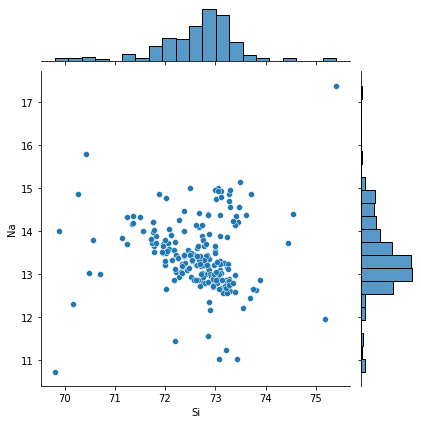

In [24]:
# Jointplots
sns.jointplot(x= 'Si', y= 'Na', data=data)
plt.show()

#### KNN Classification

In [25]:
# dividing columns in two part 'x' and 'y'

x=data.iloc[:,:10]
y=data['Type']

In [26]:
# selecting numbers of folds

num_folds = 10
kfold = KFold(n_splits=10)

In [27]:
## make model of KNN
## select random numbers of neighbors for model making

model = KNeighborsClassifier(n_neighbors=17)
result = cross_val_score(model, x, y, cv=kfold)

In [28]:
print(result.mean()*100)

67.14285714285714


#### Grid Search For Algorithm Tuning

In [29]:
n_neighbor = np.array(range(1,40))
grid = dict(n_neighbors=n_neighbor)

In [30]:
model_new = KNeighborsClassifier()
grid_new = GridSearchCV(estimator=model_new, param_grid=grid)
grid_new.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [31]:
print(grid_new.best_score_)
print(grid_new.best_params_)

0.9627906976744185
{'n_neighbors': 1}


In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

In [33]:
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

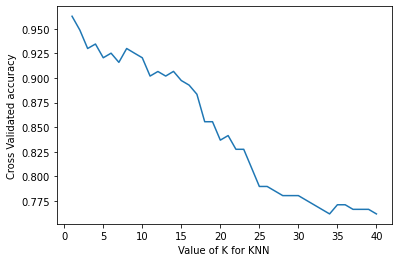

In [34]:
# Ploting Clearity

plt.plot(k_range, k_scores)
plt.ylabel('Cross Validated accuracy')
plt.xlabel('Value of K for KNN')

plt.show()

## Problem Statement 2

Implement a KNN model to classify the animals in to categories

In [35]:
zoo = pd.read_csv(r"/content/Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### EDA

In [36]:
# rows and columns in data
zoo.shape

(101, 18)

In [37]:
zoo.columns   # columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [38]:
zoo.index   # rows

RangeIndex(start=0, stop=101, step=1)

In [39]:
# Info of data
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [40]:
# Descriptive analysis
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [41]:
print(zoo['type'].unique())      # unique values
print(zoo['catsize'].unique())

[1 4 2 7 6 5 3]
[1 0]


In [42]:
zoo['type'].value_counts()     # value counts

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [43]:
# To split the observations into two part we find median
print("Mean is: ", zoo['type'].mean())
print("Median is: ", zoo['type'].median())

Mean is:  2.8316831683168315
Median is:  2.0


In [44]:
# We split the variables into two parts using median
type = []
for value in zoo['type']:
    if value<=2:
        type.append(0)
    else:
        type.append(1)
        
zoo['type'] = type

In [45]:
zoo['type'].value_counts()

0    61
1    40
Name: type, dtype: int64

In [46]:
zoo[zoo.duplicated()]   # No duplicated column

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [47]:
zoo.corr()    # Find Correlation between variables

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.533473
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.402381
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.601075
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.669393
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,-0.166708
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.411806
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.114934
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.130738
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.575085
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.632703


In [48]:
zoo.rename({"animal name": 'animal_name'}, axis = 1, inplace = True)   # Rename the column

#### Visualization

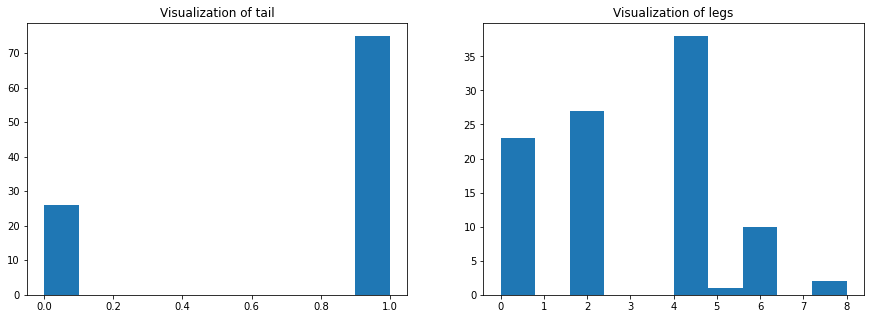

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(15,5))
ax[0].hist('tail', data = zoo); ax[0].set_title('Visualization of tail')
ax[1].hist('legs', data = zoo); ax[1].set_title("Visualization of legs")
plt.show()

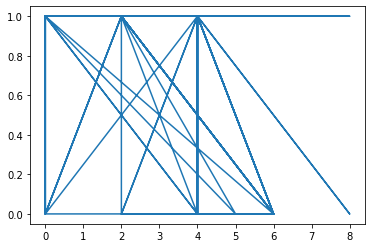

In [50]:
plt.plot('legs', 'tail', data = zoo)  # Relationship between tail and legs of animals

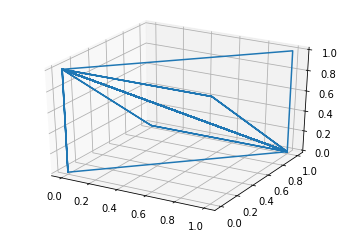

In [51]:
# 3D plot shows relation between hair, eggs and milk
p = zoo['hair']
q = zoo['milk']
r = zoo['eggs']
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

In [52]:
zoo.drop("animal_name", axis = 1, inplace = True)  # Drop un-neccessary  column from dataset

In [53]:
zoo.dtypes  # Check data types

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

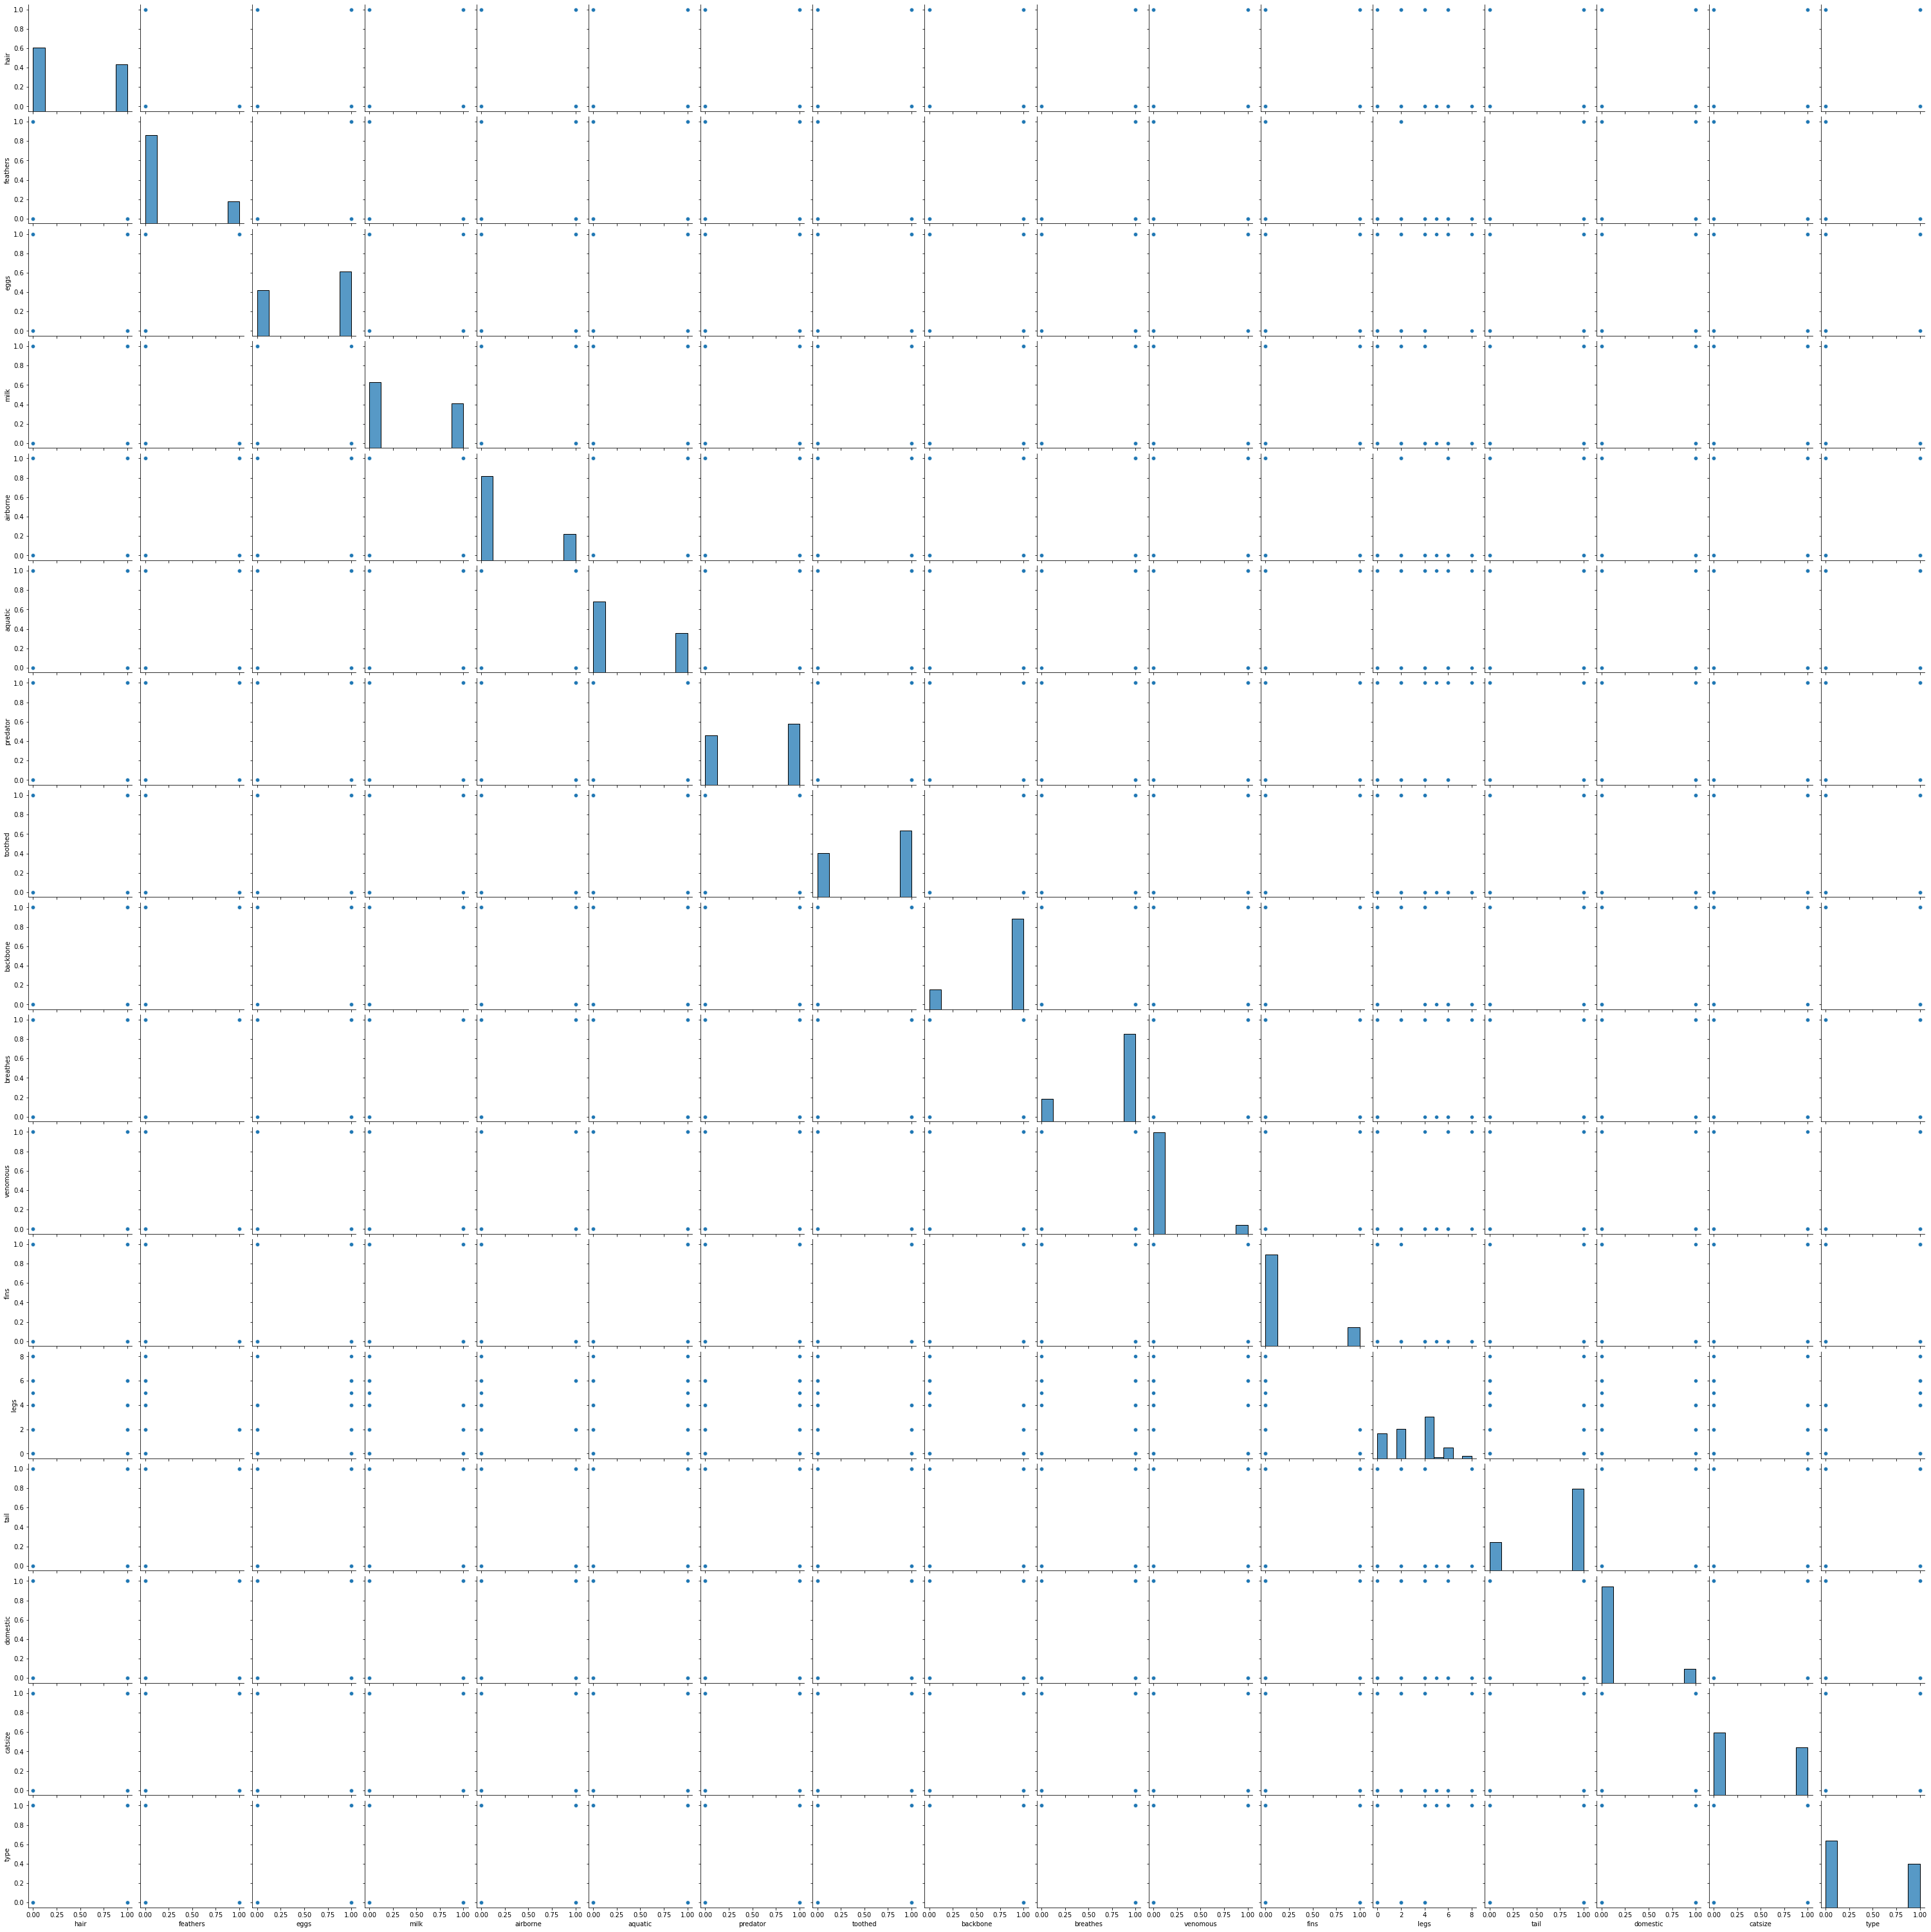

In [54]:
# Plot pairplot for visualization all in one.
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(zoo)
plt.show()

In [55]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

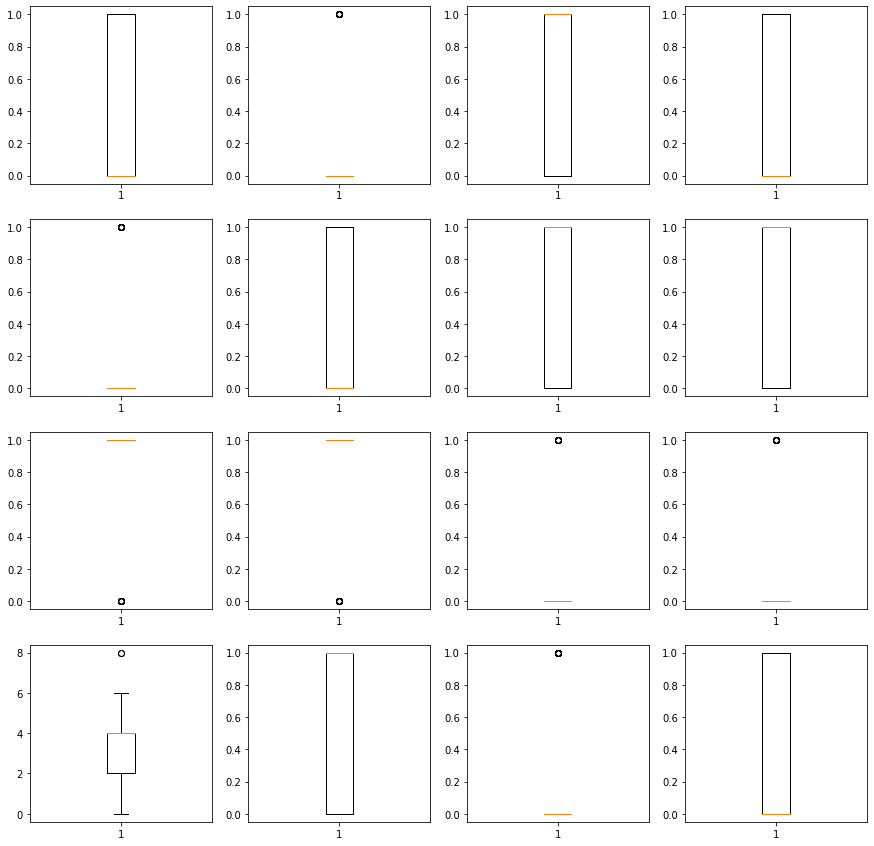

In [56]:
# Plot Boxplot To find outliers exist or not
fing, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15,15))
ax[0,0].boxplot(zoo['hair'])
ax[0,1].boxplot(zoo['feathers'])
ax[0,2].boxplot(zoo['eggs'])
ax[0,3].boxplot(zoo['milk'])
ax[1,0].boxplot(zoo['airborne'])
ax[1,1].boxplot(zoo['aquatic'])
ax[1,2].boxplot(zoo['predator'])
ax[1,3].boxplot(zoo['toothed'])
ax[2,0].boxplot(zoo['backbone'])
ax[2,1].boxplot(zoo['breathes'])
ax[2,2].boxplot(zoo['venomous'])
ax[2,3].boxplot(zoo['fins'])
ax[3,0].boxplot(zoo['legs'])
ax[3,1].boxplot(zoo['tail'])
ax[3,2].boxplot(zoo['domestic'])
ax[3,3].boxplot(zoo['catsize'])
plt.show()

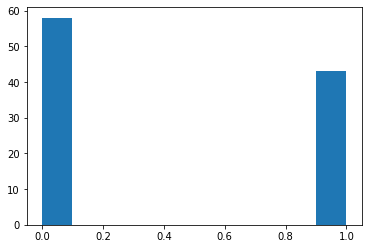

In [57]:
plt.hist(zoo['hair'])  # Histogram : Checking Outliers
plt.show()

#### KNN Classification

In [58]:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Dividing dataset into input and output
array = zoo.values
X, Y = array[:,:-1], array[:, -1]
print(X)
print(Y)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]
[0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0]


In [60]:
print(X.shape)
print(Y.shape)

(101, 16)
(101,)


In [61]:
kfold = KFold(n_splits = 10)

In [62]:
'''Cross_val_score is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. 
This cross validation method gives you a better understanding of model performance over the whole dataset instead of just
a single train/test split.'''

model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.9100000000000001


#### Grid Search for Algorithm Tuning

In [63]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [64]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [65]:
print(grid.best_score_)

0.99


#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
import pickle

In [67]:
zoo.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [68]:
# Dividing dataset into input and output
X = zoo.iloc[:,:-1]
Y = zoo.iloc[:,-1]
print(X)
print(Y.unique())

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [69]:
# Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X, Y)

LogisticRegression()

In [70]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [71]:
# Predict for X Dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [72]:
y_pred_zoo = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})
y_pred_zoo

,actual,predicted_prob
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
96,0,0
97,1,1
98,0,0
99,1,1


In [73]:
# Confusion Matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[61  0]
 [ 0 40]]


In [74]:
((61+40)/(61+0+0+40))*100

100.0

In [75]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        40

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



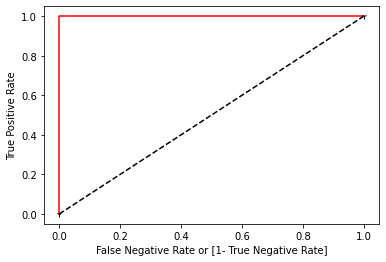

In [76]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel("False Negative Rate or [1- True Negative Rate]"); plt.ylabel('True Positive Rate')
plt.show()

In [77]:
auc   # Accuracy

1.0

#### Decision Tree

In [78]:
# Model Building, Training , Testing is already done in logistic regression.
# Splitting data into training and testing data sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 40)

In [79]:
# Building Decision Tree Classifier Using Entropy Criteria.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

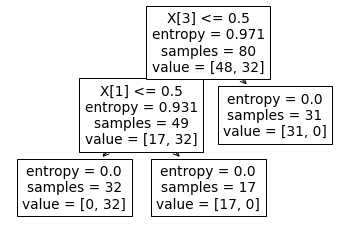

In [81]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [82]:
Y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [83]:
col = zoo.columns
col

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [84]:
zoo['type'].value_counts()

0    61
1    40
Name: type, dtype: int64

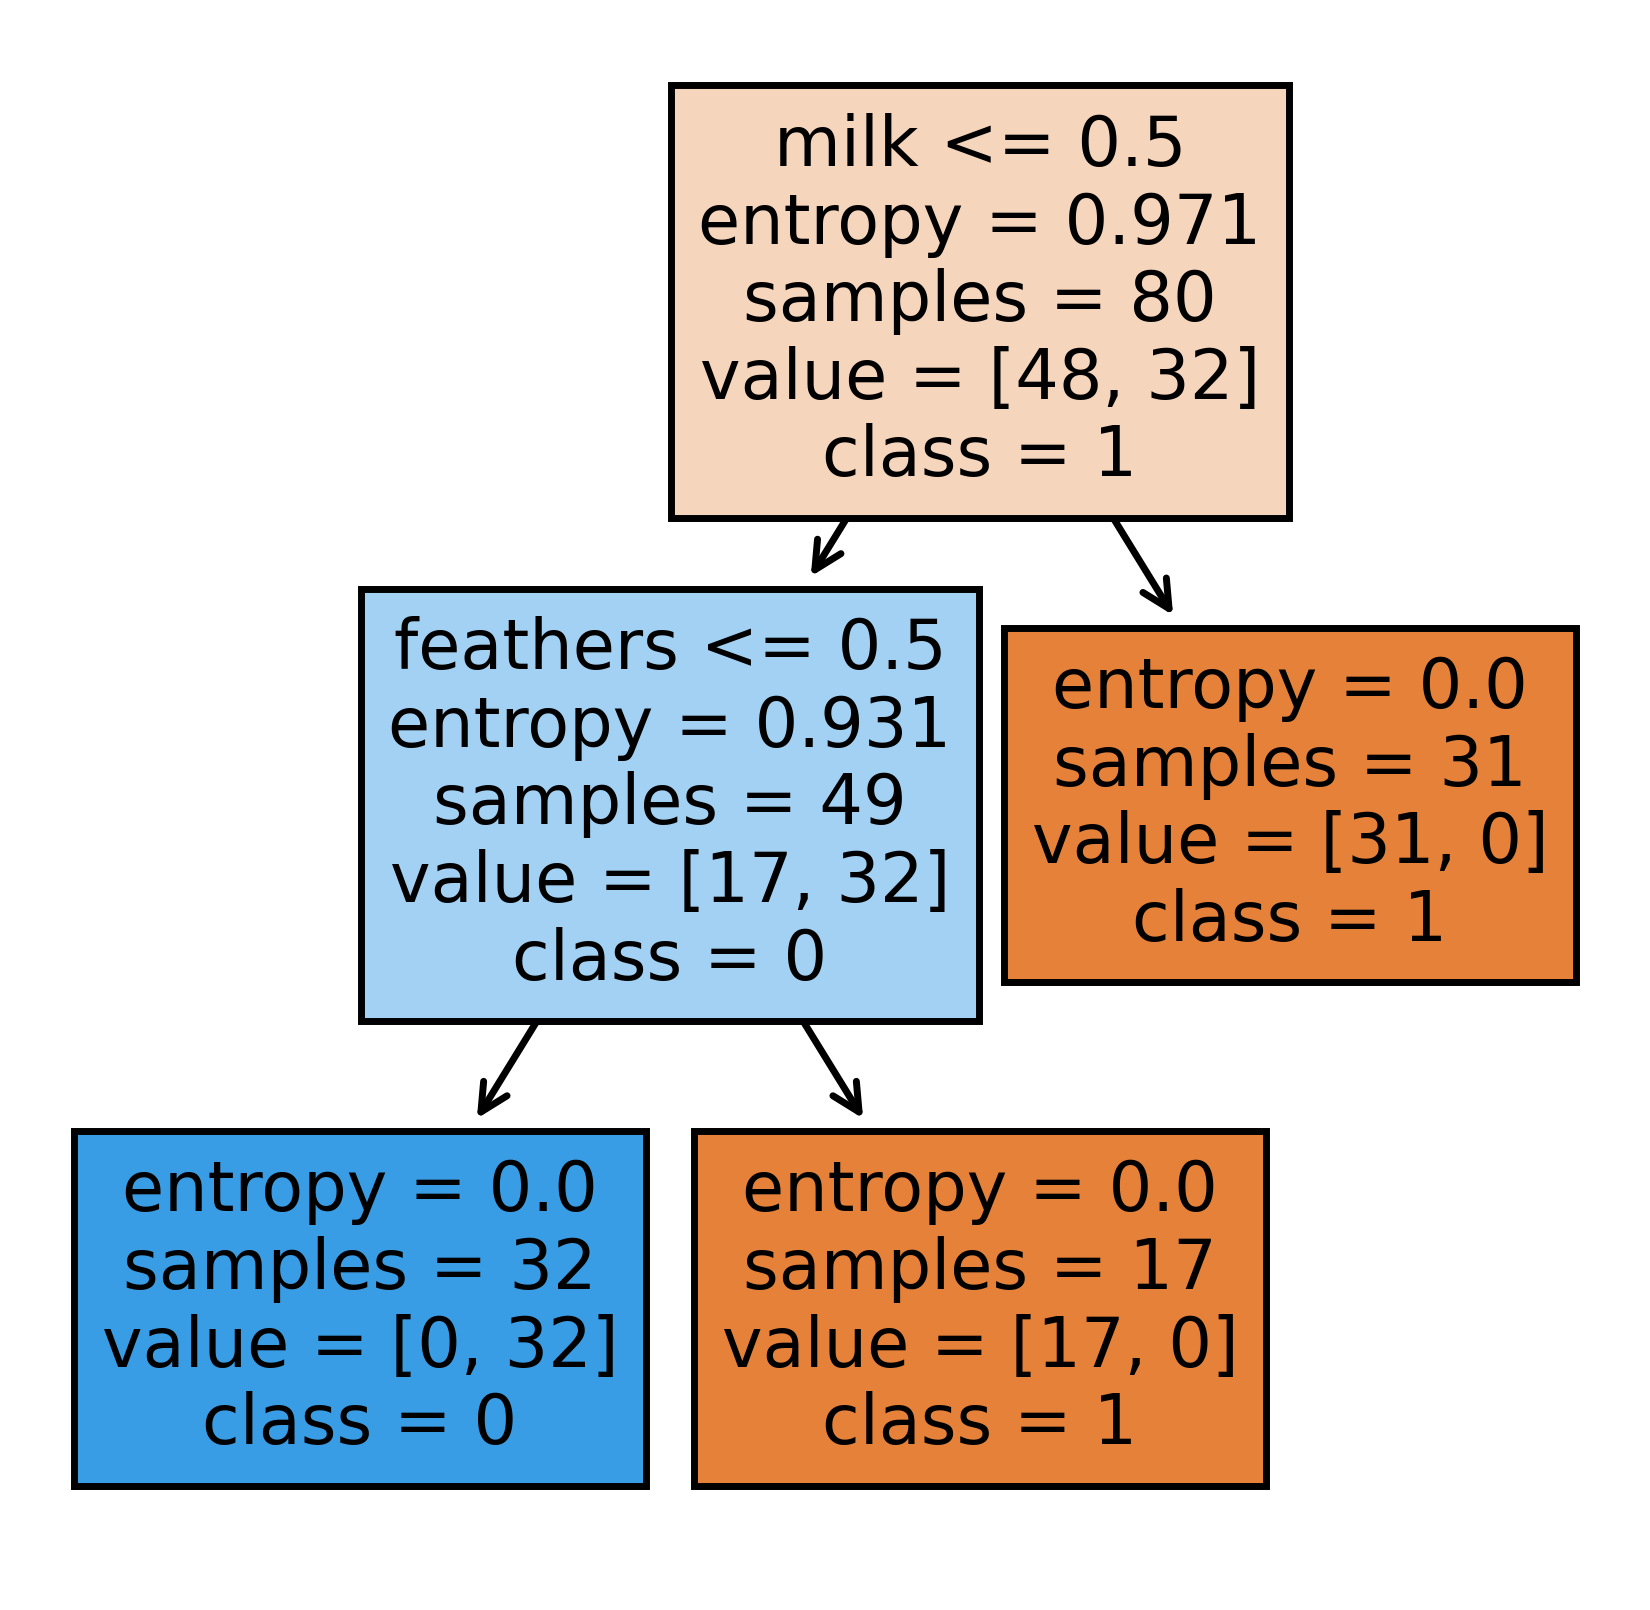

In [85]:
from sklearn import tree
col = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']
cn = ['1','0']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [86]:
# Predicting on test data
preds = model.predict(X_test)  # Predicting on test data set
pd.Series(preds).value_counts()    # Getting the count of each category

0    13
1     8
dtype: int64

In [87]:
Y_test.value_counts()

0    13
1     8
Name: type, dtype: int64

In [88]:
preds

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [89]:
pd.crosstab(Y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
type,,
0,13,0
1,0,8


In [90]:
preds, Y_test

(array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]),
 80    1
 75    0
 63    0
 15    1
 38    1
 11    0
 40    1
 45    0
 39    1
 62    1
 84    0
 4     0
 47    0
 27    0
 76    1
 17    0
 87    0
 33    0
 9     0
 93    0
 72    1
 Name: type, dtype: int64)

In [91]:
# Accuracy
from sklearn.metrics import accuracy_score
np.mean(preds == Y_test), accuracy_score(Y_test, preds)

(1.0, 1.0)

#### Building Decision Tree Classifier (CART) using Gini Criteria.

In [92]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [93]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
# Prediction and Computing the accuracy
pred = model.predict(X_test)
np.mean(preds == Y_test)

1.0

In [95]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [96]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [97]:
# Find the accuracy
model.score(X_test, Y_test)

0.7424242424242424

#### SVM

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
x_tr, x_t, y_tr, y_t = train_test_split(X , Y, test_size = 0.3)

In [100]:
x_tr.shape, y_tr.shape, x_t.shape, y_t.shape

((70, 16), (70,), (31, 16), (31,))

In [101]:
# Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 300)
gsv.fit(x_tr,y_tr)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=300)

In [102]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 1.0)

In [103]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_t)
acc= accuracy_score(y_t, y_pred) * 100
print('Accuracy is: ', acc)
confusion_matrix(y_t, y_pred)

Accuracy is:  100.0


array([[20,  0],
       [ 0, 11]])